#**Google Net/Inception Net**

[Paper](https://arxiv.org/pdf/1409.4842.pdf)

Paper Explanation

1. [Resource 1](https://youtu.be/C86ZXvgpejM)
2. [Resource 2](https://youtu.be/VxhSouuSZDY)

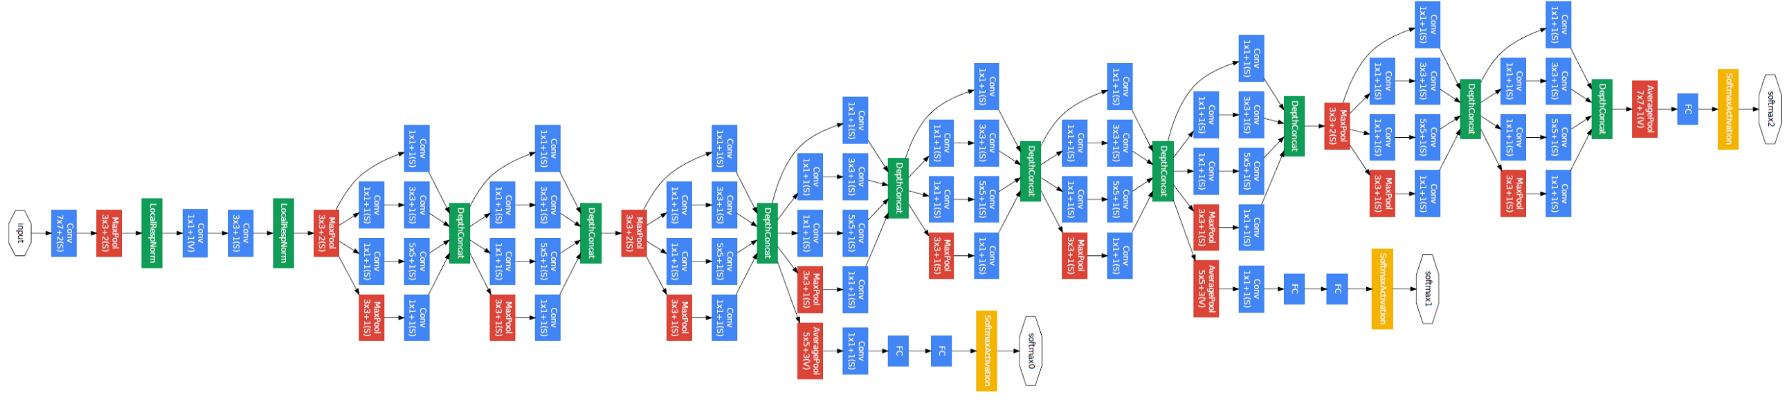

Each Layer looks like:


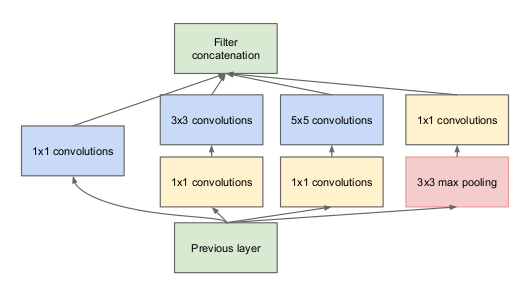

In [ ]:
# Importing necessary libraries
import tensorflow as tf
import keras
# from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
# from keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
np.random.seed(1000)

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
from keras.layers import Input
input_img = Input(shape = (32, 32, 3))

In [ ]:
from keras.layers import Conv2D, MaxPooling2D

tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

from keras.layers import Flatten, Dense
output = Flatten()(output)
out    = Dense(10, activation='softmax')(output)

In [ ]:
from keras.models import Model
model = Model(inputs = input_img, outputs = out)
# print model.summary()

In [ ]:
from tensorflow.keras.optimizers import SGD
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
1563/1563 [==============================] - 1091s 698ms/step - loss: 1.2371 - accuracy: 0.5718 - val_loss: 1.2296 - val_accuracy: 0.5666
Epoch 2/5
1563/1563 [==============================] - 1088s 696ms/step - loss: 1.0973 - accuracy: 0.6203 - val_loss: 1.2044 - val_accuracy: 0.5823
Epoch 3/5
1563/1563 [==============================] - 1082s 692ms/step - loss: 1.0445 - accuracy: 0.6400 - val_loss: 1.1678 - val_accuracy: 0.5929
Epoch 4/5
1563/1563 [==============================] - 1080s 691ms/step - loss: 1.0118 - accuracy: 0.6504 - val_loss: 1.1650 - val_accuracy: 0.5927
Epoch 5/5
1563/1563 [==============================] - 1086s 695ms/step - loss: 0.9855 - accuracy: 0.6604 - val_loss: 1.1541 - val_accuracy: 0.5965
